<a href="https://colab.research.google.com/github/tejasreemachavarapu08/CODECRAFT_ML_04/blob/main/hand%20gestures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
from google.colab import files
files.upload()  # Upload the kaggle.json file you downloaded from Kaggle


Saving kaggle (1).json to kaggle (1) (2).json


{'kaggle (1) (2).json': b'{"username":"tejasreemachavarapu","key":"c4864e2137b7488f8eba12d0590e5cdc"}'}

In [22]:
!mkdir -p ~/.kaggle
!mv "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


In [23]:
!pip install -q kaggle


In [24]:
!kaggle datasets download -d gti-upm/leapgestrecog


Dataset URL: https://www.kaggle.com/datasets/gti-upm/leapgestrecog
License(s): CC-BY-NC-SA-4.0
100% 2.12G/2.13G [00:30<00:00, 47.2MB/s]
100% 2.13G/2.13G [00:31<00:00, 73.7MB/s]


In [25]:
!unzip -q leapgestrecog.zip


In [26]:
import os

# Check the top-level folder
os.listdir('leapGestRecog')


['09', '06', '01', '07', '03', '05', '00', '02', '04', '08']

In [28]:
os.listdir()


['.config',
 'leapgestrecog.zip',
 'kaggle (1) (1).json',
 'kaggle (1) (2).json',
 'kaggle.json',
 'leapGestRecog',
 'leapgestrecog',
 'kaggle (2).json',
 'sample_data']

In [32]:
import os, cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

IMG_SIZE = 100
DATA_PATH = "leapGestRecog"
X, y = [], []

# Load dataset properly by extracting numeric part from folder names like '01_l'
for subject in os.listdir(DATA_PATH):
    subject_path = os.path.join(DATA_PATH, subject)
    if not os.path.isdir(subject_path):
        continue
    for gesture in os.listdir(subject_path):
        gesture_path = os.path.join(subject_path, gesture)
        try:
            label = int(gesture[:2])  # Only first 2 characters are label (e.g., '02_l' -> 2)
        except ValueError:
            continue  # Skip folders with unexpected names
        for img_file in os.listdir(gesture_path):
            img_path = os.path.join(gesture_path, img_file)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
                X.append(img)
                y.append(label)
            except:
                continue

# Preprocessing
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y = np.array(y)

print("Unique labels:", np.unique(y))  # Debugging step
y = to_categorical(y, num_classes=11)  # Fix: set correct class count


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(11, activation='softmax')  # Fixed output shape
])


Unique labels: [ 1  2  3  4  5  6  7  8  9 10]


In [33]:
# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 133s 264ms/step - accuracy: 0.7340 - loss: 0.7986 - val_accuracy: 0.9985 - val_loss: 0.0057
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 133s 247ms/step - accuracy: 0.9885 - loss: 0.0352 - val_accuracy: 0.9992 - val_loss: 0.0020
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 148s 259ms/step - accuracy: 0.9906 - loss: 0.0275 - val_accuracy: 0.9992 - val_loss: 0.0034
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 259ms/step - accuracy: 0.9946 - loss: 0.0205 - val_accuracy: 0.9998 - val_loss: 6.7874e-04
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 142s 260ms/step - accuracy: 0.9963 - loss: 0.0113 - val_accuracy: 1.0000 - val_loss: 6.9578e-04
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 140s 257ms/step - accuracy: 0.9949 - loss: 0.0149 - val_accuracy: 0.9998 - val_loss: 9.5585e-04
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 131s 262ms/step - accuracy: 0.9951 - loss: 0.0117 - val_accuracy: 0.9995 - val_loss: 0.0014
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 141s 260ms/step - accura

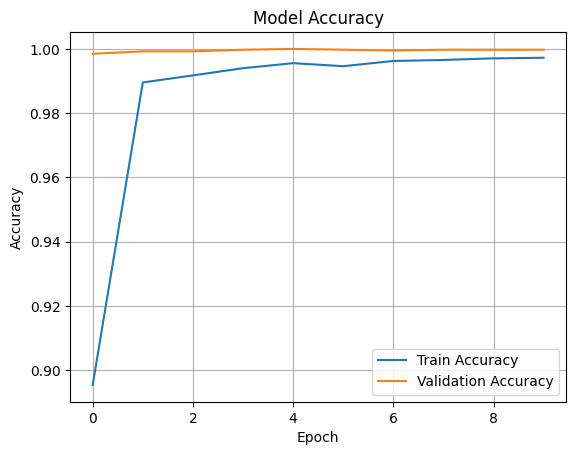

In [34]:

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [35]:

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.9999 - loss: 1.2096e-04
Test Accuracy: 99.98%


In [38]:
from sklearn.metrics import classification_report
import numpy as np

# Predict
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred_classes))


125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       392
           2       1.00      1.00      1.00       417
           3       1.00      1.00      1.00       409
           4       1.00      1.00      1.00       366
           5       1.00      1.00      1.00       418
           6       1.00      1.00      1.00       404
           7       1.00      1.00      1.00       403
           8       1.00      1.00      1.00       377
           9       1.00      1.00      1.00       404
          10       1.00      1.00      1.00       410

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


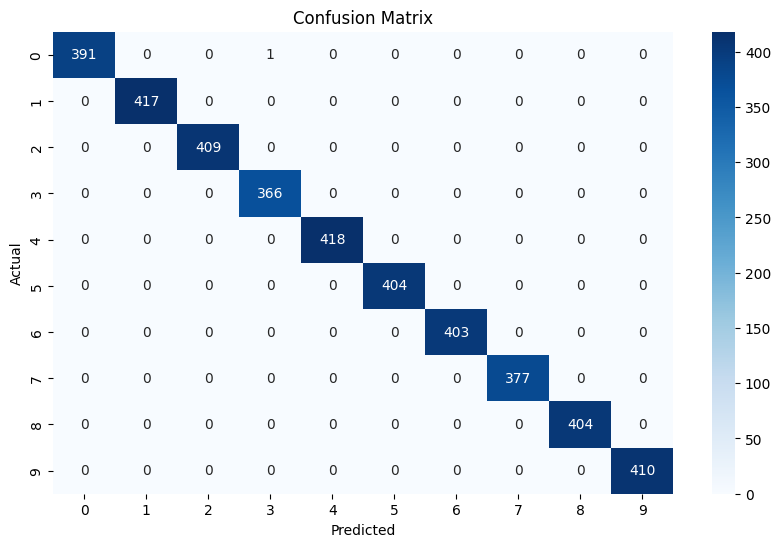

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
